# PROJECT:Investigate shopping dataset

# Introduction

The shopping dataset under consideration encapsulates a comprehensive record of customer transactions within a retail environment. Collected over a specified period, this dataset offers valuable insights into consumer behavior, purchasing patterns, and various aspects of retail operations. The dataset comprises a range of features that capture diverse facets of the shopping experience.

# Analysis of the DataSet (questions that is analyized in the dataset):

1.Information about the item purchased best seller

2.how many percentage for about clients gender treat with our company?  

3.Information About Review Rating Density ?

4.what is the relation between columns 'Age','Purchase Amount (USD)','Review Rating','Previous Purchases'?

5.:what is the correlation between purchase amount and age for subscription human?  

6.what is top 10 location Consume our products ?

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
df=pd.read_csv(r"E:\dataset\shopping_trends.csv")
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [21]:
df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [25]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

<Axes: >

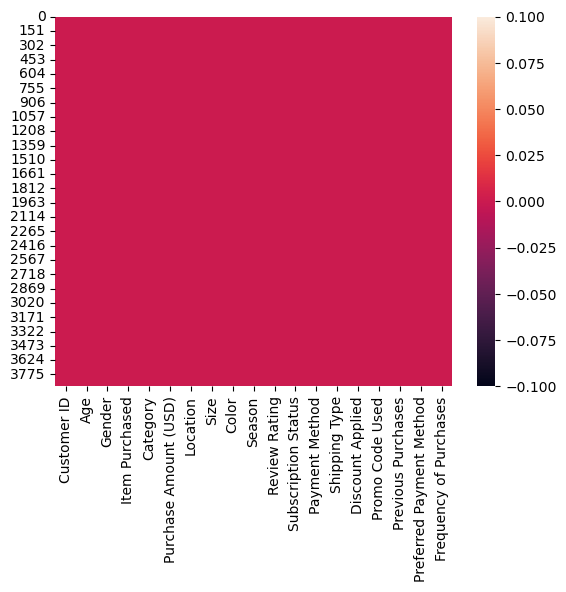

In [22]:
sns.heatmap(df.isnull())

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

# Data Cleaning

In [27]:
print(df.columns.tolist())

['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Review Rating', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']


In [28]:
sum(df.duplicated())

0

In [5]:
#df.drop_duplicates(['Customer ID',],inplace=True)
#df.drop(['Preferred Payment Method'], axis=1, inplace=True)
df['Age'] = pd.to_numeric(df['Age'])
AgeMean=df['Age'].mean()
df['Age'].fillna(AgeMean,inplace=True)
df['Purchase Amount (USD)'] = pd.to_numeric(df['Purchase Amount (USD)'])
PurchaseMean=df['Purchase Amount (USD)'].mean()
df['Purchase Amount (USD)'].fillna(PurchaseMean,inplace=True)
df['Review Rating'] = pd.to_numeric(df['Review Rating'])
RatingMean=df['Review Rating'].mean()
df['Review Rating'].fillna(RatingMean,inplace=True)
df['Previous Purchases'] = pd.to_numeric(df['Previous Purchases'])
PreviousMean=df['Previous Purchases'].mean()
df['Previous Purchases'].fillna(PreviousMean,inplace=True)
GenderMode=df['Gender'].mode()
df['Gender'].fillna(GenderMode,inplace=True)
SizeMode=df['Size'].mode()
df['Size'].fillna(SizeMode,inplace=True)
la=LabelEncoder()
df.Gender=la.fit_transform(df.Gender)

# Exploratory Data Analysis

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [15]:
numerical_list=['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']
outliers_list=[]
for column in numerical_list:    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_list.append(outliers)

In [16]:
outliers_list

[Empty DataFrame
 Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
 Index: [],
 Empty DataFrame
 Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
 Index: [],
 Empty DataFrame
 Columns: [Customer ID, Age, Gender, Item Purchased, Category, Purchase Amount (USD), Location, Size, Color, Season, Review Rating, Subscription Status, Payment Method, Shipping Type, Discount Applied, Promo Code Used, Previous Purchases, Preferred Payment Method, Frequency of Purchases]
 Index: [],
 Empty DataFrame
 Columns: [Customer ID, Age, 

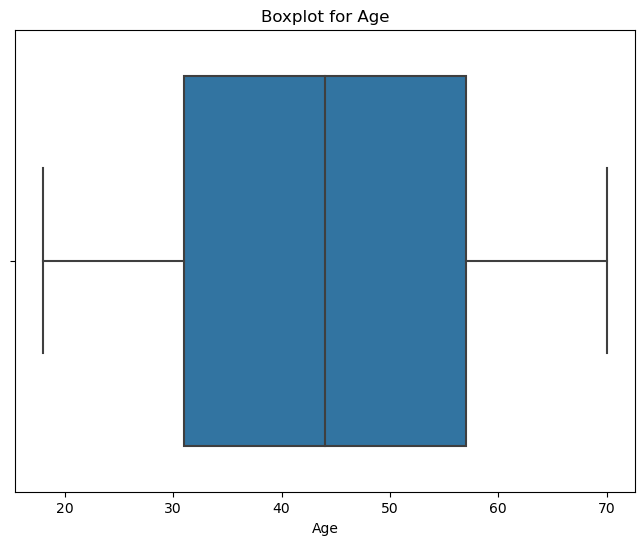

In [35]:
plt.figure(figsize=(8,6))
sn.boxplot(x=df['Age'])
plt.title('Boxplot for Age')
plt.show()

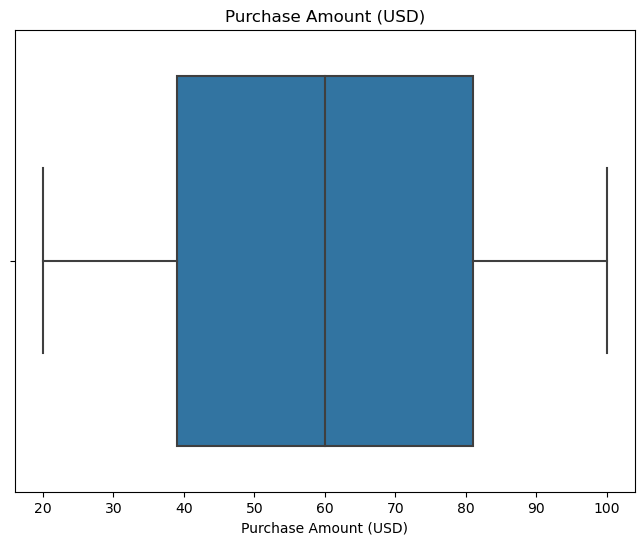

In [36]:
plt.figure(figsize=(8,6))
sn.boxplot(x=df['Purchase Amount (USD)'])
plt.title('Purchase Amount (USD)')
plt.show()

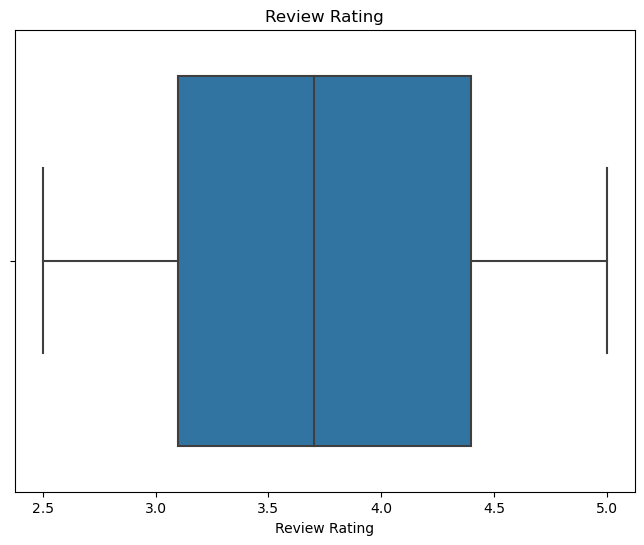

In [38]:
plt.figure(figsize=(8,6))
sn.boxplot(x=df['Review Rating'])
plt.title('Review Rating')
plt.show()

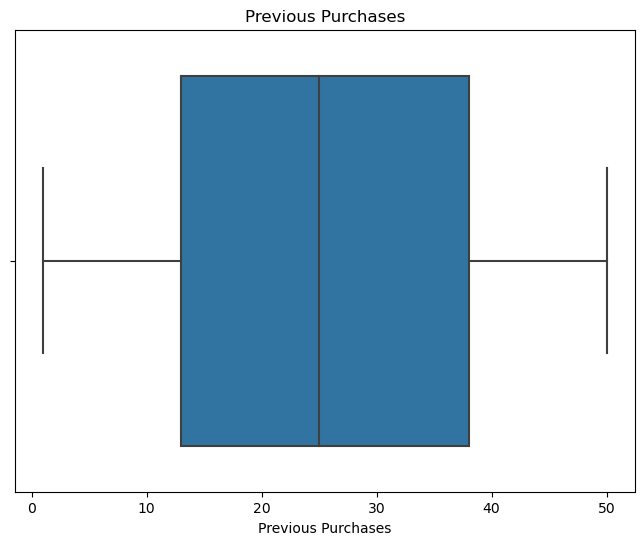

In [37]:
plt.figure(figsize=(8,6))
sn.boxplot(x=df['Previous Purchases'])
plt.title('Previous Purchases')
plt.show()

# Research Question 1: Information about the item purchased best seller

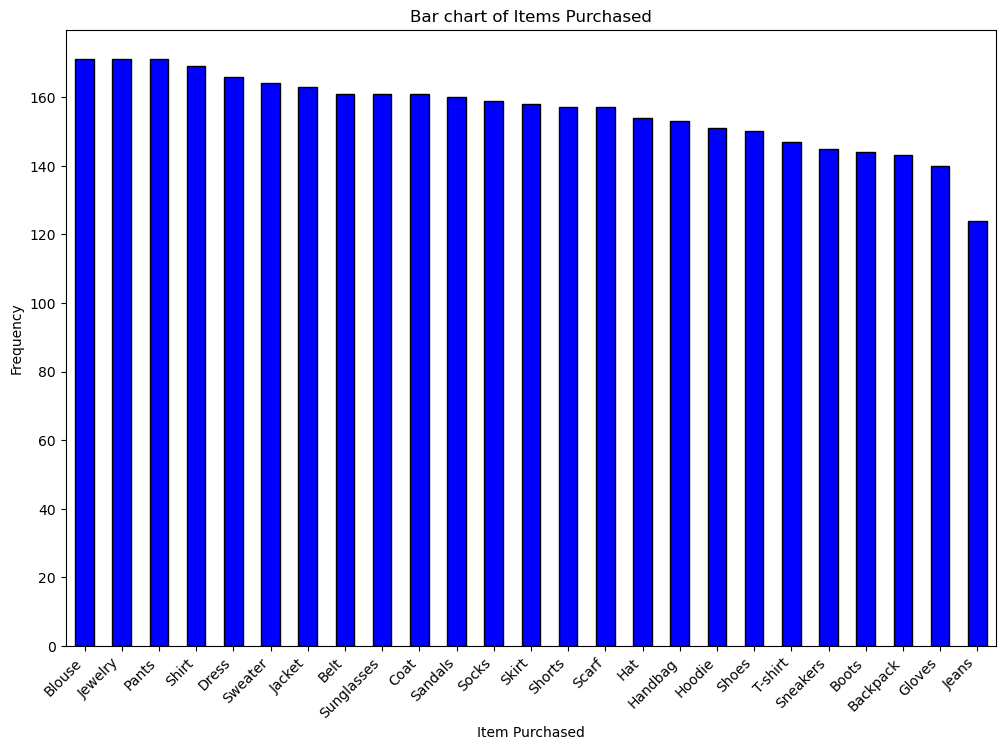

In [17]:
plt.figure(figsize=(12, 8))
df['Item Purchased'].value_counts().plot(kind='bar', color='Blue', edgecolor='black')
plt.title('Bar chart of Items Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

From the figure shown it appears that Blouse,Jewelry,Pants and Shirt It is a best seller

Production of these products can be increased

# Research Question 2: how many percentage for about clients gender treat with our company?

<Axes: ylabel='count'>

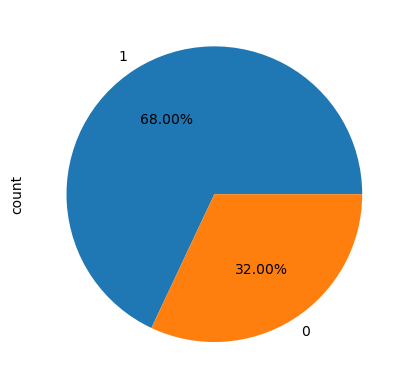

In [29]:
df.Gender.value_counts().plot.pie(autopct='%0.2f%%')

from this pie chart the percenage between males and females is 2,125% 

# Research Question 3: Information About Review Rating Density ?

C:\Users\you\AppData\Local\Temp\ipykernel_10876\170390231.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Review Rating'], color='blue', shade='True');


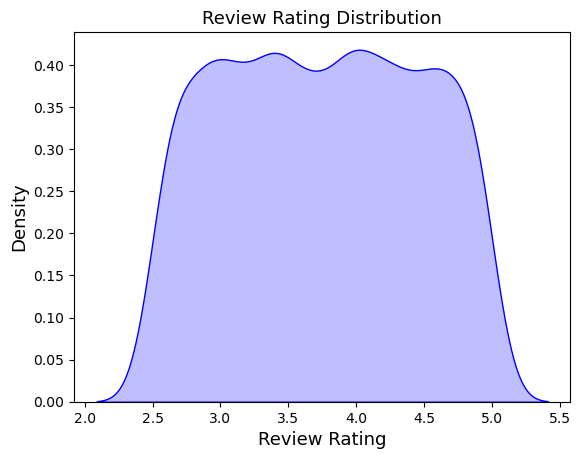

In [44]:
sns.kdeplot(df['Review Rating'], color='blue', shade='True');
plt.xlabel('Review Rating', fontsize = 13)
plt.ylabel('Density', fontsize=13)
plt.title('Review Rating Distribution', fontsize=13)
plt.show()

this graph is appeared that review rating for your production have Highly rated

# Research Question 4:what is the relation between columns 'Age','Purchase Amount (USD)','Review Rating','Previous Purchases'?

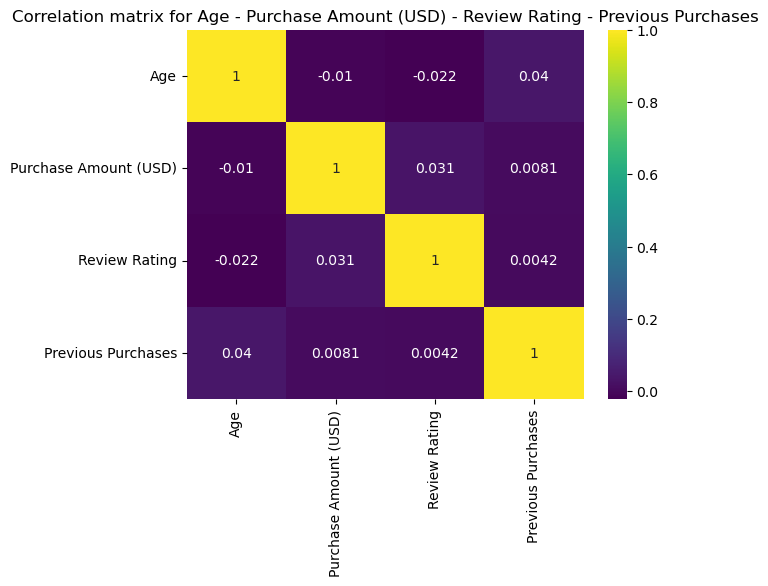

In [49]:
data=df[['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']]
corr_mat=data.corr(method='pearson')
sns.heatmap(corr_mat, cmap='viridis' , annot = True)
plt.title("Correlation matrix for Age - Purchase Amount (USD) - Review Rating - Previous Purchases")
plt.show()

\from this heatmap shows There are a positive and negative correlation between fourth variables

# Research Question 5:what is the correlation between purchase amount and age for subscription human?

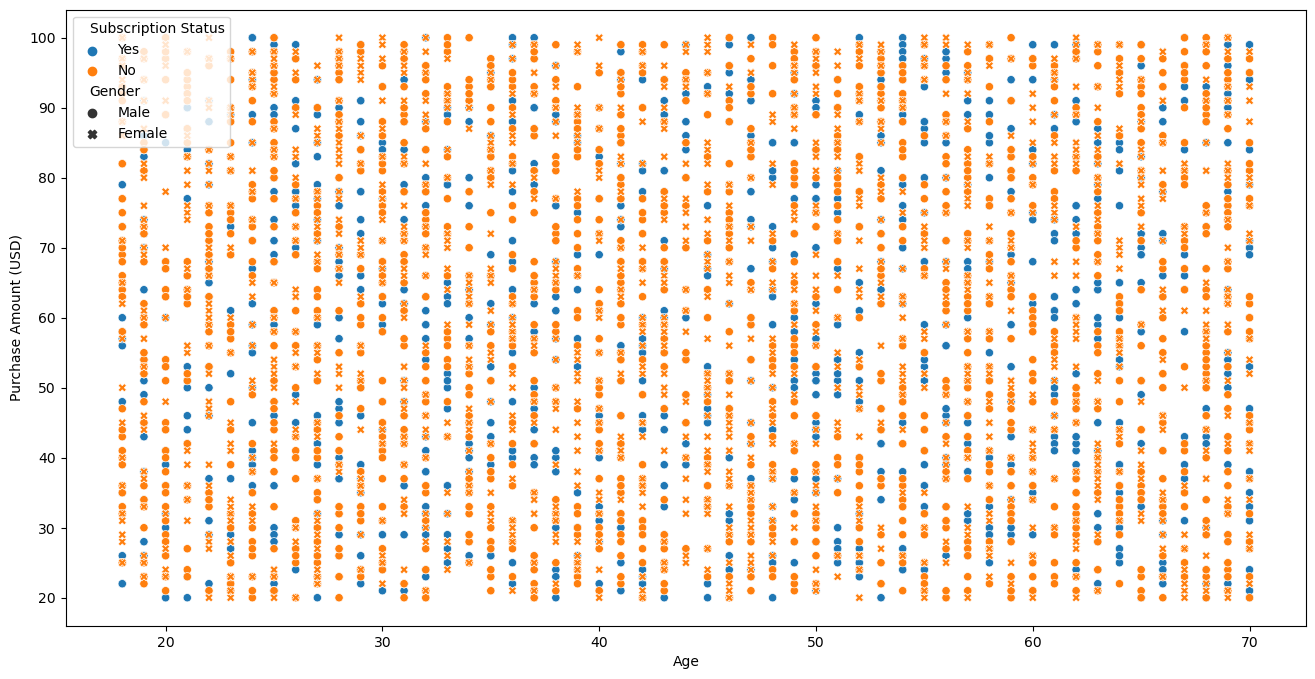

In [9]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=df, hue='Subscription Status', style='Gender')
plt.show()

from the figure appears that the most customers don not have Subscription Status 


# Research Question 6:what is top 10 location Consume our products ?

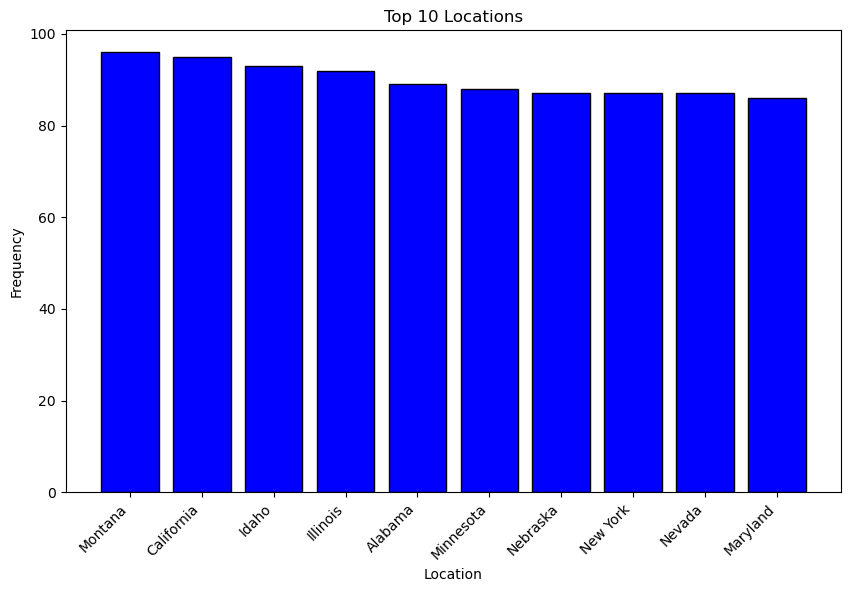

In [24]:
top_locations = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_locations.index, top_locations.values, color='blue', edgecolor='black')
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

the graph show the best locatins for consume our products 